# Overview

This notebook imports Woodstock formatted input data files and optimize the harvest scheduling considering even flow constrainsts and other constraints. 

In [1]:
%pip install gurobipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import ws3.forest, ws3.core, ws3.opt
import csv
import numpy as np
# from util import compile_scenario, plot_scenario, cmp_c_z, cmp_c_cflw, cmp_c_caa, cmp_c_ci, gen_scenario, run_scenario

from util_walt import compile_scenario, plot_scenario, cmp_c_z, cmp_c_cflw, cmp_c_caa, cmp_c_ci, gen_scenario, run_scenario

import gurobipy as grb

In [3]:
base_year = 2020
horizon = 10
period_length = 10
max_age =  1000
tvy_name = 'totvol'
max_harvest = 1

In [4]:
fm = ws3.forest.ForestModel(model_name='goldenbear',
                            model_path='./data/woodstock_model_files_goldenbear',
                            base_year=base_year,
                            horizon=horizon,
                            period_length=period_length,
                            max_age=max_age)
fm.import_landscape_section()
fm.import_areas_section()
fm.import_yields_section()
fm.import_actions_section()
fm.import_transitions_section()
fm.initialize_areas()
fm.add_null_action()
fm.reset_actions()

fm.grow()

At this point, we have a simple but fully functional ws3 model instance. 

In [5]:
# fm.reset()

Here is the age distribution for the AOI

Note that the `Problem.solve` method return a reference to the lower-level `gurobi.Model` object in case we need or want to poke around it (can yield insight into how the optimization problem is formulated on the solver side of things, or help debug).

Be vigilant for "infeasible or unbounded model" messages and such below, in case these are unexpected. Depending on how the rest of the model was set up, `ws3` may automatically attempt to resolve infeasible models using "feasibility relaxation" mode in Gurobi (which might not be what you want, depending on the situation).

running base scenario
Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-09
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel Core Processor (Broadwell, IBRS), instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 3905 rows, 36130 columns and 36130 nonzeros
Model fingerprint: 0x8452508b
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 3905 rows and 36130 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.03 seconds (0.01 work units)
Optimal objective -0.000000000e+00


(<Figure size 1200x400 with 3 Axes>,
    period  oha  ohv           ogs
 0       1  0.0  0.0  7.017250e+06
 1       2  0.0  0.0  9.700620e+06
 2       3  0.0  0.0  1.271923e+07
 3       4  0.0  0.0  1.589677e+07
 4       5  0.0  0.0  1.906853e+07
 5       6  0.0  0.0  2.210494e+07
 6       7  0.0  0.0  2.491125e+07
 7       8  0.0  0.0  2.743300e+07
 8       9  0.0  0.0  2.962489e+07
 9      10  0.0  0.0  3.146610e+07,
 <ws3.opt.Problem at 0x7fb11f17c760>)

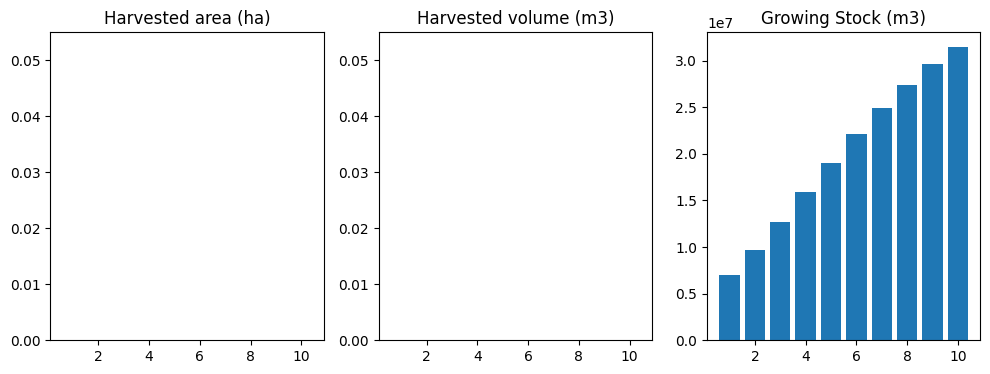

In [6]:
run_scenario(fm, 'base')